In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import cv2
from scipy.stats import multivariate_normal

In [2]:
def media(I):
    ch = I.shape[2]
    med=np.zeros(ch,)
    for i in range(ch):
        med[i]=np.mean(I[:,:,i].ravel())
    return med

In [3]:
def mcov(I):
    nx,ny,ch = I.shape
    It=np.zeros((ch,nx*ny))
    for i in range(ch):
        It[i,:]=I[:,:,i].ravel()
    cova=np.cov(It)
    return cova

In [4]:
def mcovi(I,sx,sy):
    I=I.astype(np.float)
    nx,ny,ch = I.shape
    It=np.zeros((ch,len(sx)))
    for i in range(ch):
        It[i,:]=I[sx,sy,i].ravel()
    cova=np.cov(It)
    return cova

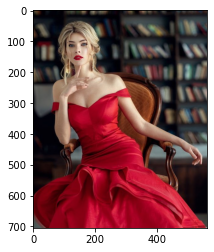

In [5]:
I = cv2.imread('imcolor3.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I,cmap='gray')
nx,ny,ch = I.shape

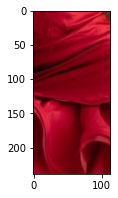

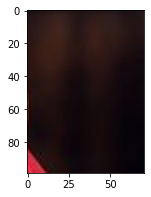

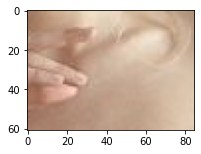

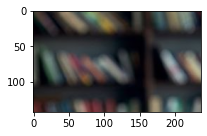

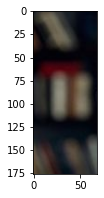

In [6]:
nm=5
phi=np.ones([nm,])/nm
med=np.zeros((nm,ch))
mc=np.zeros((nm,ch,ch))
for i in range(nm):
    roi=cv2.selectROI('sel',I)
    cv2.destroyWindow('sel')
    Iroi=I[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2]),:]
    fig=plt.figure(figsize = (3,3))
    plt.imshow(Iroi)
    med[i,:]=media(Iroi)
    mc[i,:,:]=mcov(Iroi)
medr=med 
mcovr=mcov


[[135.52930722   6.44336653  24.61084163]
 [ 32.98961445  15.86484564  17.16787594]
 [199.09315333 167.9876567  145.54059788]
 [ 58.45504706  58.30040424  57.72824644]
 [ 46.40678524  40.96261528  40.54125494]]
___________
[[151.81891307  14.5488314   34.89168732]
 [ 34.80878781  21.55420519  23.10089579]
 [171.85572098 133.8062225  114.60148738]
 [ 74.41362503  66.33635208  63.30832174]
 [ 63.39039084  51.3204276   48.43624368]]
___________
[[151.78899271  14.80324125  35.12702338]
 [ 32.32437132  23.22158122  25.27494809]
 [164.75976641 126.59487202 108.82315664]
 [ 79.75810997  67.8420274   63.32166913]
 [ 59.67851768  51.49082052  49.64827855]]
___________
[[152.01942835  14.64227171  35.10790118]
 [ 33.09470408  24.6874935   26.70778926]
 [161.13283675 124.55180411 107.61472046]
 [ 84.11061364  69.52784393  64.06912394]
 [ 55.69249522  50.42189079  49.4176011 ]]
___________
[[152.3346887   14.53490539  35.11335171]
 [ 34.31650501  26.09842134  27.99883777]
 [159.17698974 124.20527

<function matplotlib.pyplot.show(close=None, block=None)>

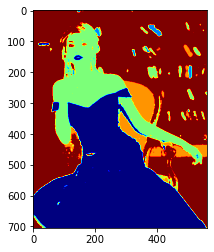

In [7]:
med=medr  
mcov=mcovr
print(med)
print("___________")

lon=nx*ny
pdf=np.zeros((nm,lon))             
It=np.zeros((lon,ch))
for i in range(ch):
    It[:,i]=I[:,:,i].ravel()
It=It.astype(np.float)
pdf=np.zeros((lon,nm))

for ite in range(30):
    for model in range(nm):
        pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
    pdf=np.nan_to_num(pdf)
    pdft=np.sum(pdf,axis=1)
    gamma=pdf.T/pdft
    gamma=np.nan_to_num(gamma)
    
    for model in range(nm):
        temp=np.reshape(gamma[model,:],(nx,ny))
        gamma[model,:]=cv2.blur(temp,(30, 30)).ravel()
        #gamma[model,:]=cv2.GaussianBlur(temp,(15,15),cv2.BORDER_DEFAULT).ravel()
    assign=np.argmax(gamma,axis=0)
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        classt=np.where(assign==model)
        classt=classt[0]
        sx,sy=np.unravel_index(classt, (nx,ny))
        for i in range(ch):
            med[model,i]=np.dot(gamma[model,:],It[:,i])/suma
        mc[model,:,:]=mcovi(I,sx,sy)
    print(med)
    print("___________")
for model in range(nm):
    pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
pdf=np.nan_to_num(pdf)
pdft=np.sum(pdf,axis=1)
gamma=pdf.T/pdft
gamma=np.nan_to_num(gamma)
for j in range(nm):
    temp=np.reshape(gamma[model,:],(nx,ny))
    gamma[model,:]=cv2.blur(temp,(30,30)).ravel()
assign=np.argmax(gamma,axis=0)
assign=np.reshape(assign,(nx,ny))
plt.imshow(assign,cmap='jet')
plt.show

[152.40162756  14.5793143   35.14543702]


<function matplotlib.pyplot.show(close=None, block=None)>

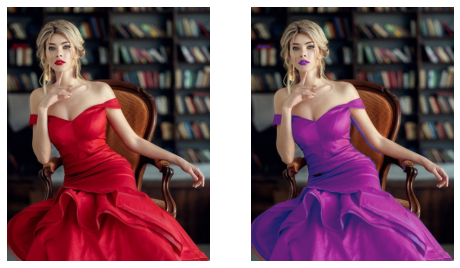

In [8]:
change=0
print(med[change,:])
assign=np.argmax(gamma,axis=0)
classt=np.where(assign==change)
classt=classt[0]
sx,sy=np.unravel_index(classt, (nx,ny))
It=np.copy(I)
for i in range(len(sx)):
    It[sx[i],sy[i],0]=It[sx[i],sy[i],0]-30
    It[sx[i],sy[i],1]=It[sx[i],sy[i],1]+30
    It[sx[i],sy[i],2]=It[sx[i],sy[i],2]+100
fig1=plt.figure(figsize = (8,8))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

b = fig1.add_subplot(1, 2, 2)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');
plt.imshow(It,cmap='gray')
plt.show
